In [1]:
%matplotlib inline

In [2]:
%load_ext line_profiler

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\F}{\mathcal{F}}$

$\newcommand{\tg}{\mathrm{tg}}$
$\newcommand{\ctg}{\mathrm{ctg}}$
$\newcommand{\arctg}{\mathrm{arctg}}$
$\newcommand{\cov}{\mathrm{cov}}$
$\newcommand{\argmax}{\mathrm{argmax}}$
$\newcommand{\argmin}{\mathrm{argmin}}$

$\newcommand{\condit}{\thinspace\rvert\thinspace}$

$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\b}{\mathbf{b}}$
$\newcommand{\a}{\mathbf{a}}$

$\newcommand{\Y}{\mathbf{Y}}$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from ggplot import *

In [5]:
from matplotlib import colors as clrs
from matplotlib.colors import ListedColormap

In [6]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import laplace
from scipy.stats import rv_discrete

In [7]:
from timeit import default_timer as timer

In [8]:
import sys

# Print iterations progress
def printProgress(iteration, total, prefix = '', suffix = '', decimals = 1, barLength = 100):
    """\n    Call in a loop to create terminal progress bar\n    @params:\n        iteration   - Required  : current iteration (Int)\n        total       - Required  : total iterations (Int)\n        prefix      - Optional  : prefix string (Str)\n        suffix      - Optional  : suffix string (Str)\n        decimals    - Optional  : positive number of decimals in percent complete (Int)\n        barLength   - Optional  : character length of bar (Int)\n    """
    formatStr       = "{0:." + str(decimals) + "f}"
    percents        = formatStr.format(100 * (iteration / float(total)))
    filledLength    = int(round(barLength * iteration / float(total)))
    bar             = '█' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),
    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

### Singular Spectrum Analysis

Consider time series $\displaystyle{X_N=(x_1,\ldots,x_N)}$, let $L<N$ be a user defined window length of the algorithm.

**Decomposition**

**Step 1. Embedding.** 
Define $K=N-L+1$ lagged vectors $\displaystyle{X_i=(x_i,\ldots,x_{i+L-1})^T}$, $1\leq i \leq K$.
Define the trajectory (Hankel) matrix 
$\displaystyle{
\X=(X_1,\ldots,X_K)=\left(\begin{array}{cccc}
x_1 & x_2 & \cdots & x_K \\
x_2 & x_3 & \cdots & x_{K+1} \\
\vdots & \vdots & \vdots & \vdots \\
x_L & x_{l+1} & \cdots & x_N
\end{array}\right)
}$

**Step 2. Singular value decomposition.**
Define $\S=\X\X^T$ matrix and consider it's eigenvalue decomposition $\S U=\lambda U$, 
and arrange eigenvalue in decreasing order $\lambda_1\geq\ldots\geq\lambda_L\geq 0$.
Let $d=\min(L,K)$, define $\displaystyle{V_i=\frac{1}{\lambda_i}\X^TU_i}$, $i=1,\ldots,d$.
The SVD of trajectory matrix $\X$ is defined as $\displaystyle{\X=\X_1+\cdots+\X_d}$. The collection $\displaystyle{(\lambda_i,U_i,V_i)}$ is called eigentriple.

**Reconstruction**

**Step 3. Eigentriple grouping**
Partition indices $\{1,2,\ldots,d\}$ into disjoint subsets $I_1,I_2,\ldots,I_m$, what leads to the next grouping
$\displaystyle{\X=\X_{I_1}+\cdots+\X_{I_m}}$.

**Step 4. Diagonal averaging**
As far as $X_{I_k}$ are not likely to be a Hankel matrices (that means can't be transformed back to trajectories) we have to diagonalize them. 

Define $L^*=\min(L,K)$, $K^*=\max(L,K)$, $N=L+K-1$, let 
$\displaystyle{x_{ij}^*=\left\{\begin{array}{ll}
x_{ij} & \text{if } L<K\\
x_{ji} & \text{if } L\geq K
\end{array}\right.}$

By diagonal averaging we transform matrix $\X$ to time series $x=(x_1,\ldots,x_k,\ldots,x_N)$ with elements:
$$\displaystyle{
x_k=\left\{\begin{array}{ll}
\frac{1}{k}\sum_{m=1}^kx_{m,k-m+1}^* & \text{for } 1\leq k\leq L^* \\
\frac{1}{L^*}\sum_{m=1}^{L^*}x_{m,k-m+1}^* & \text{for } L^*\leq k \leq K^* \\
\frac{1}{N-k+1}\sum_{m=k-K^*+1}^{N-K^*+1}x_{m,k-m+1}^* & \text{for } K^*< k\leq N
\end{array}\right.}$$

### SSA forecasting algorithm via linear recurrence relations (LLR)

**Algorithm inputs**

* Consider time series $X_N=(x_1,\ldots,x_N)$, $N>2$
* Define window length $L$, $1<L<N$
* Introduce a linear space $\mathcal{L}_r\in \R^L$, where $r<L$. Assume, that $\mathbf{e_L\notin \mathcal{L}_r}$, where $\mathbf{e}_L=(0,0,\ldots,0,1)^T\in\R^L$
* Set forecast horizon $M$

**Notations**
* $\X$ - trajectory matrix $\displaystyle{
\X=(X_1,\ldots,X_K)}$
* $U_1,\dots,U_r$ - orthonormal basis in $\mathcal{L}_r$
* Define $U_i^*$ - vector composed of the first $L-1$ elements of $U_i$
* Define by $\tilde{x}_i$ result of Hankelization of reconstructed trajectory matrix elements
* Set $\nu^2=\pi_1^2+\cdots+\pi_r^2$, where $\pi_k$ is the last component of the vector $U_k$

**Proposition**
* Let $Y=(y_1,\ldots,y_L)^T\in\mathcal{L}_r$
* The last component $y_l$ is a linear combination of the first components $y_1,\ldots,y_{L-1}$:
$$y_l=a_1y_{L-1}+a_2y_{L-2}+\cdots+a_Ly_1$$
or in vector form
$$\displaystyle{\mathbf{a}=\frac{1}{1-\nu^2}\sum_{i=1}^r\pi_iU_i^*}$$

**Recurrent forecasting**
* The time series $Y_{N+m}=(y_1,\ldots,y_{N+M})$ is defined by
$$\displaystyle{
y_i=\left\{\begin{array}{ll}
\tilde{x}_i, & i=1,\ldots,N, \\
\sum_{j=1}^{L-1}a_jy_{i-j}, & i=N+1,\ldots,N+M
\end{array}\right.}$$

### Bootstrap confidence intervals

* Perform SSA decomposition and reconstruction of time series $Y$;
* Obtain smoothed version of time series $\hat{Y}$
* Get residual vector $\varepsilon=Y-\hat{Y}$ and produce bootstrap vectors $\tilde{\varepsilon}$ from it
* Make bootstraped versions of input time series $\tilde{Y}=\hat{Y}+\tilde{\varepsilon}$
* Apply SSA to $\tilde{Y}$ to produce smoothed versions of bootstraped time series $\hat{Y}_b$
* Compute confidence bounds upon versions of $\hat{Y}_b$
* Make forecast for each $\hat{Y}_b$ to obtain confidence bounds for the forecast

In [9]:
class SSA(object):

    def __init__(self, y = None, L = None):
        if y is not None:
            self.init (y, L)
    def init(self, y, L = None):
        self.y = y
        self.n = len (y)
        if L == None:
            self.l = np.floor (self.n / 2).astype (int)
        else:
            self.l = L
        self.k = self.n - self.l + 1

    def embedding(self, y):
        X = np.zeros ((self.l, self.k))
        for i in range (self.k):
            X[:, i] = y[i:self.l + i]
        return X

    def eigentriples(self, X):
        S = np.dot (X, X.T)
        self.d = np.linalg.matrix_rank (S)
        alpha, U = np.linalg.eig (S)
        # sort eigenvalues and eigenvectors
        idx = alpha.argsort ()[::- 1]
        alpha = alpha[idx]
        U = U[:, idx]
        # form eigentriples
        alpha = np.sqrt (alpha)
        V = np.zeros_like (X).T
        for i in range (self.d):
            V[:, i] = np.dot (X.T, U[:, i]) / alpha[i]
        return alpha, U, V

    def decompose(self, y):
        self.X = self.embedding (y)
        self.alpha, self.U, self.V = self.eigentriples (self.X)

    def grouping(self, idx):
        X_fit = np.zeros_like (self.X)
        for i in idx:
            X_fit += self.alpha[i] * np.outer (self.U[:, i], self.V[:, i])
        return X_fit

    def diagonal_averaging(self, X):
        y_fit = np.zeros_like (self.y)
        for i in range (- X.shape[0] + 1, X.shape[1]):
            y_fit[i + X.shape[0] - 1] = np.mean (np.diagonal (X[:,::- 1], i))
        return y_fit

    def reconstruct(self, idx):
        self.X_fit = self.grouping (idx)
        self.y_fit = self.diagonal_averaging (self.X_fit)[::- 1]
        return self.y_fit

    def fit(self, y, L = None, idx = np.array ([0, 1, 2])):
        if L is not None:
            self.init (y, L)
        else:
            self.y = y
        self.decompose (self.y)
        self.idx = idx
        self.a = self.llr_fit()
        return self.reconstruct (self.idx)

    def llr_fit(self):
        r = len (self.idx)
        nu = 0
        p = np.zeros (r)
        a = np.zeros (self.l - 1)
        for i in range (r):
            idx = self.idx[i]
            p[i] = self.U[:, idx][- 1]
            nu += p[i] ** 2
            a += p[i] * self.U[:, idx][:- 1]
        a = a / (1 - nu)
        return a

    def predict(self, m = 10, y_fit = None, boot = False):
        if y_fit is None:
            y_fit = self.y_fit
        y = np.zeros (self.n + m)
        y[:self.n] = y_fit
        for i in range (self.n, self.n + m):
            y[i] = np.dot (self.a, y[i - self.l + 1:i])
        return y

    def bootstrap(self, m=10, conf_alpha=0.05, n_boot=1000):
        self.SSA = SSA ()
        residuals = self.y - self.y_fit
        Y = np.zeros ((n_boot, self.n + m))
        for i in range (n_boot):
            resid = np.random.choice (residuals, size = self.n)
            y_boot = self.y_fit + resid
            self.SSA.init (y_boot, self.l)
            y_boot_fit = self.SSA.fit (y_boot, L = self.l, idx = self.idx)
            y_boot_pred = self.SSA.predict (m)
            Y[i,:] = y_boot_pred
        ub = np.zeros (self.n + m)
        lb = np.zeros (self.n + m)
        for i in range (self.n + m):
            ub[i] = np.percentile (Y[:, i], 100 - conf_alpha * 100.)
            lb[i] = np.percentile (Y[:, i], conf_alpha * 100.)
        self.Y = Y
        return lb, ub

### ARIMA classes

In [10]:
def MAP(X, y, alpha = 0.0):
    m = X.shape[1]
    I = np.identity (m)
    Rxx = np.dot (X.T, X)
    Ryx = np.dot (X.T, y)
    if alpha == 0.0:
        return np.dot (np.linalg.inv (Rxx), Ryx)
    elif alpha > 0.0:
        return np.dot (np.linalg.inv (Rxx + alpha * I), Ryx)

In [11]:
def autocorr(X, lag = 1):
    cross_corr = np.correlate (X, X, 'full')
    m = np.floor (len (cross_corr) / 2).astype (int)
    acov = cross_corr[m:m + lag]
    acor = acov / acov[0]
    return acor

In [12]:
class ARMA(object):

    def __init__(self, a = None, b = None, sigma = 0.01):
        self.p = a.shape[0]
        self.q = b.shape[0]
        self.r = max (self.p, self.q + 1)
        self.a = np.zeros (self.r)
        self.b = np.zeros (self.r - 1)
        self.a[:self.p] = a
        self.b[:self.q] = b

        self.H = np.zeros (self.r)
        self.H[0] = 1
        self.H[1:] = self.b

        self.G = np.zeros (self.r)
        self.G[0] = 1.

        self.set_F (self.a)
        self.x = np.zeros (self.r)

        self.sigma = sigma

    def set_F(self, a):
        _a = np.zeros (self.r)
        if a.shape[0] == self.p:
            _a[:self.p] = a
        else:
            _a = a
        F = np.zeros (self.r * self.r).reshape (self.r, self.r)
        F[:, 0] = _a
        for i in range (self.r - 1):
            F[i, i + 1] = 1.
        self.F = F.T

    def yule_walker(self, y):
        n = y.shape[0]
        r = self.r + 1
        sample_mean = np.mean (y)
        z = y - sample_mean
        self.acorr = autocorr (z, lag = r + 1)
        self.e = np.zeros (n)
        A = np.eye (r)
        b = self.acorr[1:]
        for i in range (r):
            A[i + 1:, i] = b[:- i - 1]
            if i > 0:
                A[:i, i] = b[:i][::- 1]
        self.fit_a = MAP (A, b)
        m = n - r
        b1 = y[r:]
        A1 = np.zeros (m * r).reshape (m, r)
        for i in range (r):
            A1[:, i] = y[r - i - 1:n - 1 - i]
        self.e[r:] = b1 - np.dot (A1, self.fit_a)
        return self.fit_a

    def hannan_rissanen(self, y):
        n = y.shape[0]
        b = y[self.r + 1:]
        m = n - self.r - 1
        r = self.p + self.q
        if m > 0:
            A = np.zeros (m * r).reshape (m, r)
            for i in range (r):
                if i < self.p:
                    A[:, i] = y[self.r - i:n - i - 1]
                else:
                    A[:, i] = self.e[self.r - i:n - i - 1]
            self.fit_a_b = MAP (A, b)
            self.e_ma = b - np.dot (A, self.fit_a_b)
            self.fit_a = self.fit_a_b[:self.p]
            self.fit_b = self.fit_a_b[self.p:]
            return self.fit_a, self.fit_b
        else:
            return "Incorrect y dimension"

    def fit(self, y):
        self.fit_a_ = self.yule_walker (y)
        fit_a, fit_b = self.hannan_rissanen (y)
        return fit_a, fit_b

    def simulate(self, n):
        eps = norm.rvs (0, self.sigma, size = n)
        y = np.zeros (n)
        x = self.x
        for i in range (self.r, n):
            x = y[i - self.r:i][::- 1]
            x = np.dot (self.F, x) + np.dot (self.G, eps[i])
            y[i] = np.dot (self.H, x)
        return y

In [13]:
class ARIMA(object):

    def __init__(self, a = None, b = None, r = 0, sigma = 1.):
        self.ARMA = ARMA (a, b, sigma)
        self.r = r

    def simulate(self, n):
        y = self.ARMA.simulate (n)
        for i in range (self.r):
            y = np.cumsum (y)
        return y

    def fit(self, y, r = None):
        if r == None:
            r = self.r
        y_diff = np.diff (y, n = r)
        self.fit_a, self.fit_b = self.ARMA.fit (y_diff)
        return self.fit_a, self.fit_b

### ARIMA process smoothing with SSA

ARIMA coefficients: 
 alphas: [ 0.3 -0.6] 
 betas: [ 0.1]


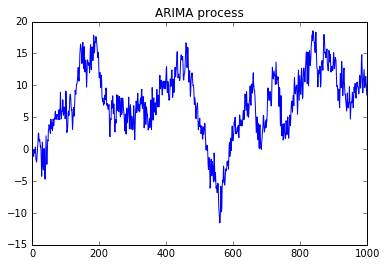

In [14]:
a = np.array ([.3, - .6])
b = np.array ([0.1])
print('ARIMA coefficients: \n alphas: {} \n betas: {}'.format(a,b))
r = 1
n = 1000
arima = ARIMA (a, b, r)
y = arima.simulate (n)
plt.plot(y)
plt.title('ARIMA process');

In [15]:
y_train = y[:600]

ARIMA process smoothed by SSA

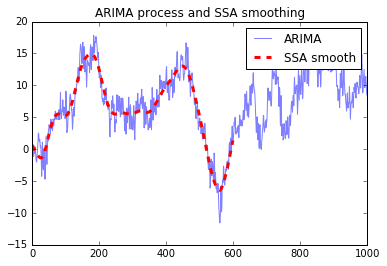

In [16]:
L = 200
ssa = SSA(y_train, L)
y_fit = ssa.fit(y_train, idx=np.arange(5))
plt.plot(y, alpha=0.5, label='ARIMA')
plt.plot (y_fit, color = 'red', label='SSA smooth', linestyle='dashed', lw=3)
plt.title('ARIMA process and SSA smoothing')
plt.legend(loc='upper right');

ARIMA process smoothed and predicted with SSA

In [17]:
lb, ub = ssa.bootstrap(100)

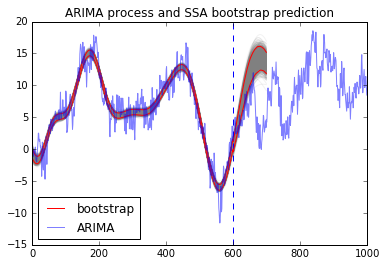

In [18]:
plt.plot (ssa.Y.T, color = 'grey', alpha = 0.1)
plt.axvline(600, linestyle='dashed')
plt.plot (lb, color = 'red', label='bootstrap')
plt.plot (ub, color = 'red')
plt.plot(y, alpha=0.5, color='blue', label='ARIMA')
plt.title('ARIMA process and SSA bootstrap prediction')
plt.legend(loc='lower left');

### Apple stocks with SSA

In [19]:
from datetime import datetime

In [20]:
from sklearn.preprocessing import scale

In [21]:
def preprocess(df):
    df['delta'] = scale ((df['Close'] - df['Open']) / df['Open']).astype (float)
    df['Date'] =[datetime.strptime (date, "%Y-%m-%d") for date in df['Date']]

In [22]:
aapl = pd.read_csv('aapl_5Y.csv')

In [23]:
preprocess(aapl)

In [24]:
y = aapl['Open'][700:].values[:- 1].astype (int)

In [28]:
#aapl

In [29]:
y_train = y[:400]

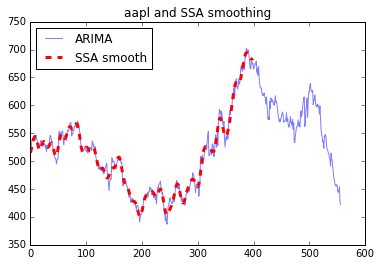

In [30]:
L = 200
ssa = SSA(y_train, L)
y_fit = ssa.fit(y_train, idx=np.arange(15))
plt.plot(y, alpha=0.5, label='ARIMA')
plt.plot (y_fit, color = 'red', label='SSA smooth', linestyle='dashed', lw=3)
plt.title('aapl and SSA smoothing')
plt.legend(loc='upper left');

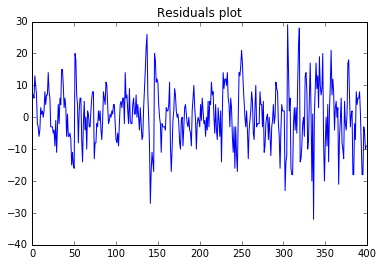

In [31]:
residuals = y_train - y_fit
plt.plot (residuals)
plt.title('Residuals plot');

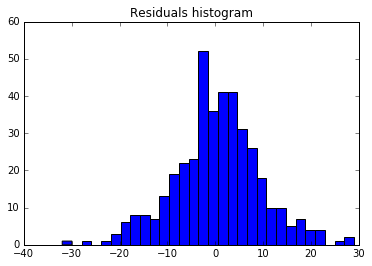

In [32]:
plt.hist(residuals, bins=30)
plt.title('Residuals histogram');

In [33]:
lb, ub = ssa.bootstrap (20)

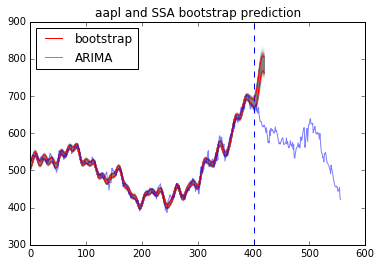

In [34]:
plt.plot (ssa.Y.T, color = 'grey', alpha = 0.1)
plt.axvline(400, linestyle='dashed')
plt.plot (lb, color = 'red', label='bootstrap')
plt.plot (ub, color = 'red')
plt.plot(y, alpha=0.5, color='blue', label='ARIMA')
plt.title('aapl and SSA bootstrap prediction')
plt.legend(loc='upper left');

### Air passengers statistics

In [35]:
df = pd.read_csv('AirPassengers.csv')

In [36]:
y = df[df.columns[1]].values[:- 1].astype (int)

In [37]:
y_train = y[:80]

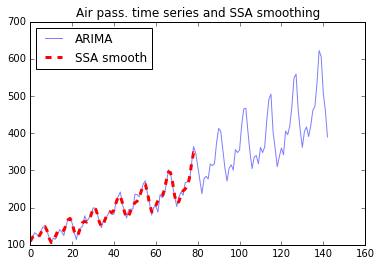

In [38]:
L = 20
ssa = SSA(y_train, L)
y_fit = ssa.fit(y_train, idx=np.arange(5))
plt.plot(y, alpha=0.5, label='ARIMA')
plt.plot (y_fit, color = 'red', label='SSA smooth', linestyle='dashed', lw=3)
plt.title('Air pass. time series and SSA smoothing')
plt.legend(loc='upper left');

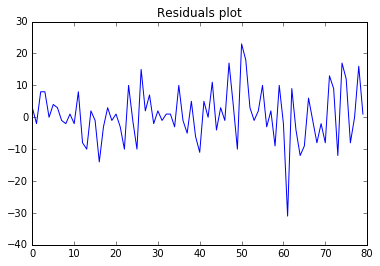

In [39]:
residuals = y_train - y_fit
plt.plot (residuals)
plt.title('Residuals plot');

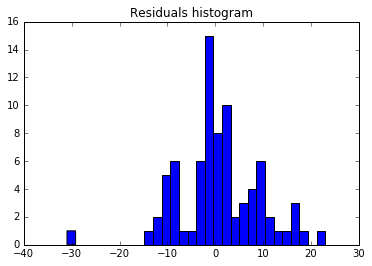

In [40]:
plt.hist(residuals, bins=30)
plt.title('Residuals histogram');

In [41]:
lb, ub = ssa.bootstrap (60)

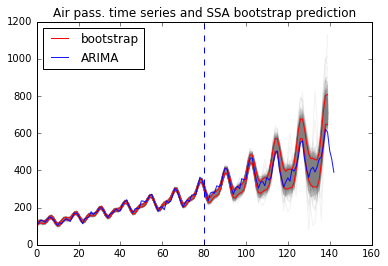

In [42]:
plt.plot (ssa.Y.T, color = 'grey', alpha = 0.1)
plt.plot (lb, color = 'red', label='bootstrap')
plt.plot (ub, color = 'red')
plt.axvline(80, linestyle='dashed')
plt.plot(y, alpha=0.9, color='blue', label='ARIMA')
plt.title('Air pass. time series and SSA bootstrap prediction')
plt.legend(loc='upper left');

**Eigenvectors plots**

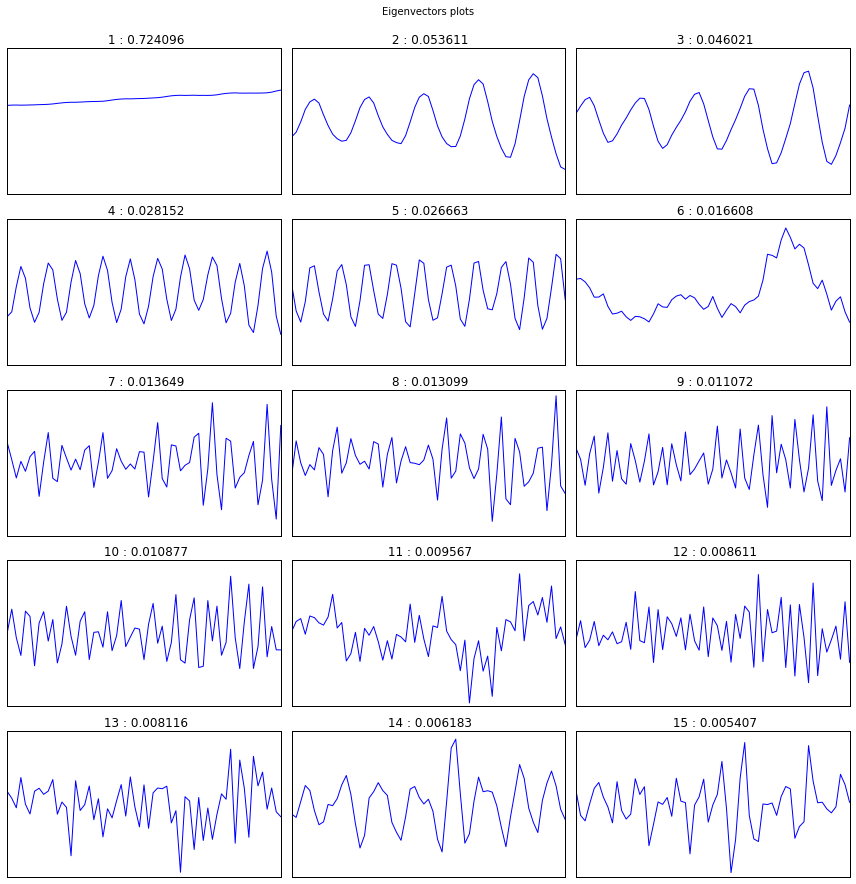

In [43]:
fig, ax = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True,)
fig.set_size_inches(12, 12)
ax = ax.flatten()
for i in range(15):
    ax[i].plot(ssa.V[:, i])
    w = ssa.alpha[i]/ssa.alpha.sum()
    ax[i].set_title(' %d : %f' % (i+1, w))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.suptitle('Eigenvectors plots', y=1.02);

**Pairs of eigenvectors**

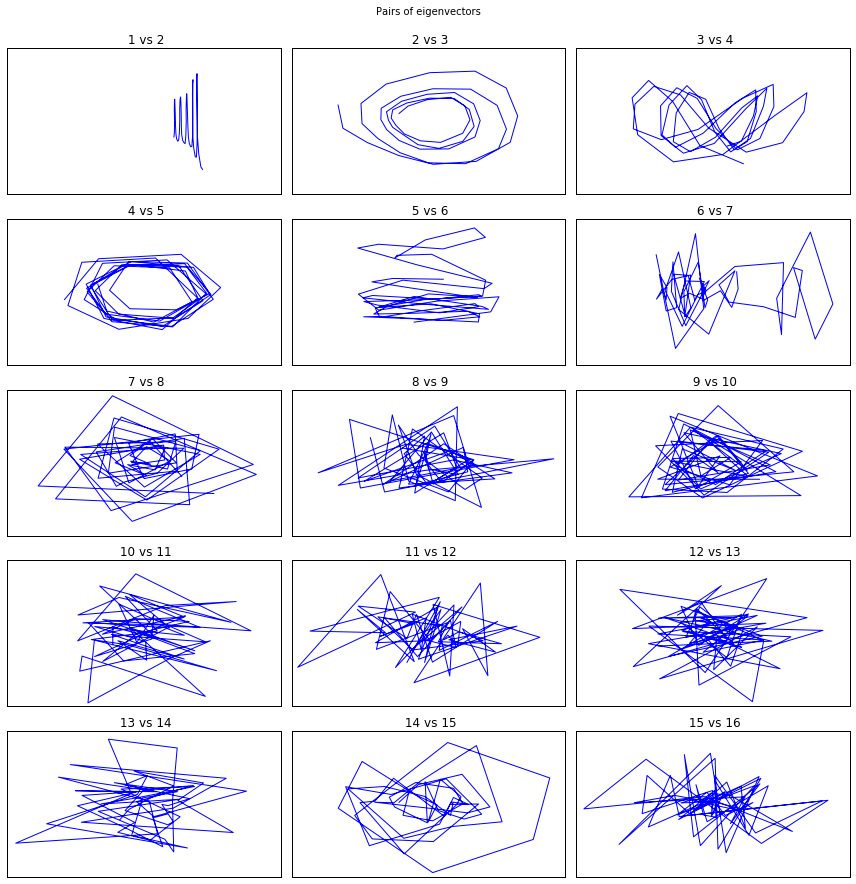

In [44]:
fig, ax = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True,)
fig.set_size_inches(12, 12)
ax = ax.flatten()
for i in range(15):
    ax[i].plot (ssa.V[:, i], ssa.V[:, i+1])
    ax[i].set_title(' %d vs %d' % (i+1, i+2))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.suptitle('Pairs of eigenvectors', y=1.02);

### SSA implementation profiling

In [45]:
%lprun -s -f ssa.fit -T lp_results.txt ssa.fit(y_train, idx=np.arange(5))
%cat lp_results.txt


*** Profile printout saved to text file 'lp_results.txt'. 
Timer unit: 1e-06 s

Total time: 0.003389 s
File: <ipython-input-9-6119d03c7923>
Function: fit at line 57

Line #      Hits         Time  Per Hit   % Time  Line Contents
    57                                               def fit(self, y, L = None, idx = np.array ([0, 1, 2])):
    58         1            4      4.0      0.1          if L is not None:
    59                                                       self.init (y, L)
    60                                                   else:
    61         1            1      1.0      0.0              self.y = y
    62         1         1566   1566.0     46.2          self.decompose (self.y)
    63         1            2      2.0      0.1          self.idx = idx
    64         1           50     50.0      1.5          self.a = self.llr_fit()
    65         1         1766   1766.0     52.1          return self.reconstruct (self.idx)

In [46]:
%lprun -s -f ssa.bootstrap -T lp_results.txt ssa.bootstrap(60)
%cat lp_results.txt


*** Profile printout saved to text file 'lp_results.txt'. 
Timer unit: 1e-06 s

Total time: 2.35789 s
File: <ipython-input-9-6119d03c7923>
Function: bootstrap at line 89

Line #      Hits         Time  Per Hit   % Time  Line Contents
    89                                               def bootstrap(self, m=10, conf_alpha=0.05, n_boot=1000):
    90         1           85     85.0      0.0          self.SSA = SSA ()
    91         1           29     29.0      0.0          residuals = self.y - self.y_fit
    92         1           26     26.0      0.0          Y = np.zeros ((n_boot, self.n + m))
    93      1001          773      0.8      0.0          for i in range (n_boot):
    94      1000        32076     32.1      1.4              resid = np.random.choice (residuals, size = self.n)
    95      1000         5732      5.7      0.2              y_boot = self.y_fit + resid
    96      1000         4523      4.5      0.2              self.SSA.init (y_boot, self.l)
    97      1000      

### Fast hankelization via FFT

See http://intlpress.com/site/pub/files/_fulltext/journals/sii/2010/0003/0003/SII-2010-0003-0003-a009.pdf

**Fast Hankelization**

**Input**
* A vector $U$ of length $L$, a vector $V$ of length $K$, a singular value $\alpha$

**Output**
* Time series $g=(g_j)_{j=1}^N$, corresponding to the matrix $Y=\alpha U V^T$ after hankelization

**Notations**
* $U\odot V$ - elementwise vector multiplication
* The 1-d discrete Fourier transform of a vector $(f_k)_{k=0^{N-1}}$ is $$\displaystyle{\hat{f}_j=\sum_{k=0}^{N-1}e^{-2\pi i k j/N}, \quad j=0,\ldots,N-1}$$
* Inverse transform: $$\displaystyle{f_k=\frac{1}{N}\sum_{j=0}^{N-1}e^{2\pi i k j/N}, \quad k=0,\ldots,N-1}$$

**Algorithm**
* $U^{\prime} \longleftarrow \left(u_1,\ldots,u_L,0,\ldots,0\right)^T\in\R^N$
* $\hat{U} \longleftarrow FFT_N(U^{\prime})$
* $V^{\prime} \longleftarrow \left(v_1,\ldots,v_K,0,\ldots,0\right)^T\in\R^N$
* $\hat{V} \longleftarrow FFT_N(V^{\prime})$
* $g^{\prime} \longleftarrow IFFT_N(\hat{V}\odot\hat{U})$
* $w \longleftarrow \left(1,\dots,L,L,\ldots,L,\ldots,1\right)\in\R^N$
* $g \longleftarrow \alpha\left(w\odot g^{\prime}\right)$

In [47]:
class SSA(object):

    def __init__(self, y = None, L = None):
        if y is not None:
            self.init (y, L)
    def init(self, y, L = None):
        self.y = y
        self.n = len (y)
        if L == None:
            self.l = np.floor (self.n / 2).astype (int)
        else:
            self.l = L
        self.k = self.n - self.l + 1

    def embedding(self, y):
        X = np.zeros ((self.l, self.k))
        for i in range (self.k):
            X[:, i] = y[i:self.l + i]
        return X

    def eigentriples(self, X):
        S = np.dot (X, X.T)
        self.d = np.linalg.matrix_rank (S)
        alpha, U = np.linalg.eig (S)
        # sort eigenvalues and eigenvectors
        idx = alpha.argsort ()[::- 1]
        alpha = alpha[idx]
        U = U[:, idx]
        # form eigentriples
        alpha = np.sqrt (alpha)
        V = np.zeros_like (X).T
        for i in range (self.d):
            V[:, i] = np.dot (X.T, U[:, i]) / alpha[i]
        return alpha, U, V

    def decompose(self, y):
        self.X = self.embedding (y)
        self.alpha, self.U, self.V = self.eigentriples (self.X)

    def grouping(self, idx):
        X_fit = np.zeros_like (self.X)
        for i in idx:
            X_fit += self.alpha[i] * np.outer (self.U[:, i], self.V[:, i])
        return X_fit

    def diagonal_averaging(self, X):
        y_fit = np.zeros_like (self.y)
        
        n = len(self.y)
        l = self.U[0].shape[0]
        k = self.V.T[0].shape[0]
        w = np.ones(n)*l
        w[:l] = np.arange(l)+1
        w[-l:] = (np.arange(l)+1)[::-1]
        w = 1/w
        u = np.zeros(n)
        v = np.zeros(n)
        y_fit = np.zeros(n)
        for i in self.idx:    
            u[:l] = self.U.T[i]
            v[:k] = self.V.T[i]  
            u_fft = np.fft.rfft(u)
            v_fft = np.fft.rfft(v)
            g = np.fft.irfft(u_fft*v_fft)
            g = self.alpha[i]*(w*g)
            y_fit += g
        return y_fit[::-1]
    
    def reconstruct(self, idx):
        self.X_fit = self.grouping (idx)
        self.y_fit = self.diagonal_averaging (self.X_fit)[::- 1]
        return self.y_fit

    def fit(self, y, L = None, idx = np.array ([0, 1, 2])):
        if L is not None:
            self.init (y, L)
        else:
            self.y = y
        self.decompose (self.y)
        self.idx = idx
        self.a = self.llr_fit()
        return self.reconstruct (self.idx)

    def llr_fit(self):
        r = len (self.idx)
        nu = 0
        p = np.zeros (r)
        a = np.zeros (self.l - 1)
        for i in range (r):
            idx = self.idx[i]
            p[i] = self.U[:, idx][- 1]
            nu += p[i] ** 2
            a += p[i] * self.U[:, idx][:- 1]
        a = a / (1 - nu)
        return a

    def predict(self, m = 10, y_fit = None, boot = False):
        if y_fit is None:
            y_fit = self.y_fit
        y = np.zeros (self.n + m)
        y[:self.n] = y_fit
        for i in range (self.n, self.n + m):
            y[i] = np.dot (self.a, y[i - self.l + 1:i])
        return y

    def bootstrap(self, m=10, conf_alpha=0.05, n_boot=1000):
        self.SSA = SSA ()
        residuals = self.y - self.y_fit
        Y = np.zeros ((n_boot, self.n + m))
        for i in range (n_boot):
            resid = np.random.choice (residuals, size = self.n)
            y_boot = self.y_fit + resid
            self.SSA.init (y_boot, self.l)
            y_boot_fit = self.SSA.fit (y_boot, L = self.l, idx = self.idx)
            y_boot_pred = self.SSA.predict (m)
            Y[i,:] = y_boot_pred
        ub = np.zeros (self.n + m)
        lb = np.zeros (self.n + m)
        for i in range (self.n + m):
            ub[i] = np.percentile (Y[:, i], 100 - conf_alpha * 100.)
            lb[i] = np.percentile (Y[:, i], conf_alpha * 100.)
        self.Y = Y
        return lb, ub

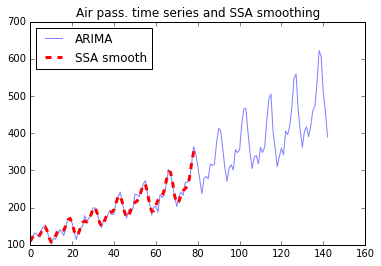

In [48]:
L = 20
ssa = SSA(y_train, L)
y_fit = ssa.fit(y_train, idx=np.arange(5))
plt.plot(y, alpha=0.5, label='ARIMA')
plt.plot (y_fit, color = 'red', label='SSA smooth', linestyle='dashed', lw=3)
plt.title('Air pass. time series and SSA smoothing')
plt.legend(loc='upper left');

In [49]:
%lprun -s -f ssa.fit -T lp_results.txt ssa.fit(y_train, idx=np.arange(5))
%cat lp_results.txt


*** Profile printout saved to text file 'lp_results.txt'. 
Timer unit: 1e-06 s

Total time: 0.00254 s
File: <ipython-input-47-76d2dfae6b84>
Function: fit at line 74

Line #      Hits         Time  Per Hit   % Time  Line Contents
    74                                               def fit(self, y, L = None, idx = np.array ([0, 1, 2])):
    75         1            2      2.0      0.1          if L is not None:
    76                                                       self.init (y, L)
    77                                                   else:
    78         1            1      1.0      0.0              self.y = y
    79         1         1604   1604.0     63.1          self.decompose (self.y)
    80         1            4      4.0      0.2          self.idx = idx
    81         1           79     79.0      3.1          self.a = self.llr_fit()
    82         1          850    850.0     33.5          return self.reconstruct (self.idx)

In [50]:
%lprun -s -f ssa.bootstrap -T lp_results.txt ssa.bootstrap(60)
%cat lp_results.txt


*** Profile printout saved to text file 'lp_results.txt'. 
Timer unit: 1e-06 s

Total time: 1.24804 s
File: <ipython-input-47-76d2dfae6b84>
Function: bootstrap at line 106

Line #      Hits         Time  Per Hit   % Time  Line Contents
   106                                               def bootstrap(self, m=10, conf_alpha=0.05, n_boot=1000):
   107         1           12     12.0      0.0          self.SSA = SSA ()
   108         1           41     41.0      0.0          residuals = self.y - self.y_fit
   109         1          547    547.0      0.0          Y = np.zeros ((n_boot, self.n + m))
   110      1001          865      0.9      0.1          for i in range (n_boot):
   111      1000        41060     41.1      3.3              resid = np.random.choice (residuals, size = self.n)
   112      1000         3530      3.5      0.3              y_boot = self.y_fit + resid
   113      1000         4766      4.8      0.4              self.SSA.init (y_boot, self.l)
   114      1000    